# Flytipping data analysis and modelling, England (UK)

In [1]:
# Import the libraries required for the task

# these modules are for data preparation and analysis
import pandas as pd
import numpy as np

#these modules are for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# this is the clustering algorithm
from sklearn.cluster import KMeans
import sklearn

In [2]:
flytip_data = pd.read_csv('flytipping.csv', encoding= 'unicode_escape', skiprows=1)
flytip_data.head()

,Year,ONS Code,LA Name,Region,Total Incidents,Highway Incidents,Footpath / Bridleway Incidents,Back Alleyway Incidents,Railway Incidents,Council Land Incidents,...,Car Boot or Less Clearance Costs (£),Small Van Load Incidents,Small Van Load Clearance Costs (£),Transit Van Load Incidents,Transit Van Load Clearance Costs (£),Tipper Lorry Load Incidents,Tipper Lorry Load Clearance Costs (£),Significant / Multi Loads Incidents,Sig / Multi Loads Clearance Costs (£),Total Incidents Clearance Costs (£)
0,2012-13,*Total,*Total,*Total England,714637.0,324284.0,96009.0,114044.0,349.0,125968.0,...,6078248.0,222545.0,12462494.0,76569.0,8805444.0,11501.0,3344394,5202.0,1784224,36585739.0
1,2012-13,*Total,*Total,East Midlands,40059.0,20345.0,4808.0,1017.0,29.0,8717.0,...,373578.0,13336.0,746816.0,3452.0,396980.0,400.0,136717,121.0,44975,1930602.0
2,2012-13,*Total,*Total,East,56484.0,20857.0,3737.0,8732.0,21.0,19750.0,...,428040.0,22550.0,1262800.0,6268.0,720820.0,805.0,212501,251.0,126105,3032202.0
3,2012-13,*Total,*Total,London,231894.0,150896.0,44594.0,5502.0,64.0,14904.0,...,2316404.0,63764.0,3570784.0,19204.0,2208460.0,2000.0,680498,1193.0,438207,10803983.0
4,2012-13,*Total,*Total,North East,56748.0,5297.0,6653.0,25961.0,53.0,15435.0,...,466146.0,21246.0,1189776.0,6738.0,774870.0,1086.0,327152,358.0,122710,3136636.0


### Slice the data by country/region/local authority

In [3]:
# get data for england
england_data = flytip_data.loc[flytip_data['ONS Code']=='*Total'].loc[flytip_data['Region']=='*Total England'].reset_index(drop=True)

In [4]:
england_data

,Year,ONS Code,LA Name,Region,Total Incidents,Highway Incidents,Footpath / Bridleway Incidents,Back Alleyway Incidents,Railway Incidents,Council Land Incidents,...,Car Boot or Less Clearance Costs (£),Small Van Load Incidents,Small Van Load Clearance Costs (£),Transit Van Load Incidents,Transit Van Load Clearance Costs (£),Tipper Lorry Load Incidents,Tipper Lorry Load Clearance Costs (£),Significant / Multi Loads Incidents,Sig / Multi Loads Clearance Costs (£),Total Incidents Clearance Costs (£)
0,2012-13,*Total,*Total,*Total England,714637.0,324284.0,96009.0,114044.0,349.0,125968.0,...,6078248.0,222545.0,12462494.0,76569.0,8805444.0,11501.0,3344394,5202.0,1784224,36585739.0
1,2013-14,*Total,*Total,*Total England,857655.0,410704.0,123936.0,118826.0,827.0,148251.0,...,7199974.0,279655.0,15660261.0,103477.0,11899445.0,15625.0,4248948,7005.0,2010750,45407171.0
2,2014-15,*Total,*Total,*Total England,905604.0,441216.0,143156.0,109174.0,1599.0,152482.0,...,7619363.0,279847.0,15543028.0,129718.0,14820561.0,17353.0,4868868,7978.0,2398964,50732983.0
3,2015-16,*Total,*Total,*Total England,941896.0,475607.0,154290.0,101912.0,658.0,147860.0,...,6745179.0,308170.0,15655561.0,120230.0,12022585.0,18252.0,3984003,6803.0,1486230,50015488.0
4,2016-17,*Total,*Total,*Total England,1011199.0,496435.0,163639.0,111263.0,330.0,162435.0,...,7956856.0,330385.0,18501537.0,140765.0,16188032.0,21393.0,6097368,10120.0,3842461,57966874.0
5,2017-18,*Total,*Total,*Total England,997553.0,463953.0,163924.0,115913.0,448.0,161566.0,...,NaN,323366.0,NaN,118326.0,NaN,20044.0,6488465,14430.0,5758654,NaN
6,2018-19,*Total,*Total,*Total England,1072431.0,493264.0,187028.0,116494.0,716.0,165678.0,...,NaN,346938.0,NaN,119789.0,NaN,21314.0,6754344,14949.0,6128925,NaN


In [5]:
# get data for the regions
regionlist = ['East Midlands', 'East','London','North East', 'North West', 'South East','South West']
region_data = flytip_data.loc[flytip_data['ONS Code']=='*Total'].loc[flytip_data['Region'].isin(regionlist)].reset_index(drop=True)

In [6]:
# get data for local authorities
flytip_la = flytip_data.loc[flytip_data['ONS Code'] != '*Total'].reset_index(drop=True)

### country wide figures
* number of fly tipping incidents in england 2012-2019

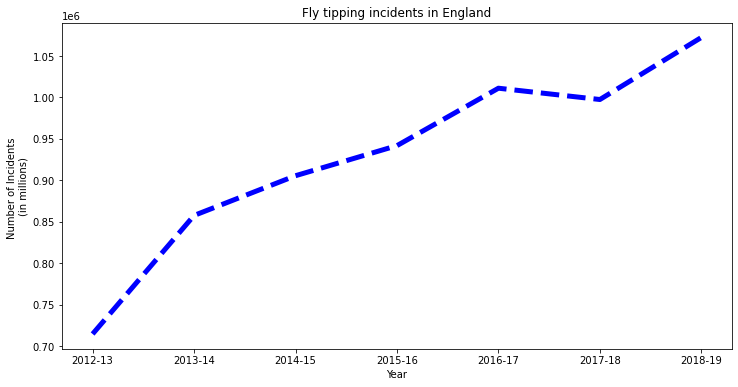

In [7]:
plt.figure(figsize=(12,6))
plt.plot(england_data['Year'], england_data['Total Incidents'], 'b--', linewidth=5.0)
plt.title('Fly tipping incidents in England')
plt.xlabel('Year')
plt.ylabel('Number of Incidents \n(in millions)')
plt.show()

## Get number of fly tipping incidents in england by location / content / transportation latest year

In [10]:
england_data.columns

Index(['Year', 'ONS Code', 'LA Name', 'Region', 'Total Incidents',
       'Highway Incidents', 'Footpath / Bridleway Incidents',
       'Back Alleyway Incidents', 'Railway Incidents',
       'Council Land Incidents', 'Agricultural Incidents',
       'Private / Residential Incidents', 'Commercial / Industrial Incidents',
       'Watercourse / Bank Incidents', 'Other (unidentified) Incidents',
       'Animal Carcass Incidents', 'Green Incidents',
       'Vehicle Parts Incidents', 'White Goods Incidents',
       'Other Electrical Incidents', 'Tyres Incidents', 'Asbestos Incidents',
       'Clinical Incidents', 'Constr / Demol / Excav Incidents',
       'Black Bags - Commercial Incidents', 'Black Bags - Household Incidents',
       'Chemical Drums, Oil, Fuel Incidents',
       'Other Household Waste Incidents', 'Other Commercial Waste Incidents',
       'Primary Waste Type Measures Other (unidentified) Incidents',
       'Single Black Bag Incidents', 'Single Black Bag Clearance Costs (£)',

In [11]:
locations = ['Highway Incidents', 'Footpath / Bridleway Incidents',
       'Back Alleyway Incidents', 'Railway Incidents',
       'Council Land Incidents', 'Agricultural Incidents',
       'Private / Residential Incidents', 'Commercial / Industrial Incidents',
       'Watercourse / Bank Incidents', 'Other (unidentified) Incidents']

In [12]:
content = ['Animal Carcass Incidents', 'Green Incidents',
       'Vehicle Parts Incidents', 'White Goods Incidents',
       'Other Electrical Incidents', 'Tyres Incidents', 'Asbestos Incidents',
       'Clinical Incidents', 'Constr / Demol / Excav Incidents',
       'Black Bags - Commercial Incidents', 'Black Bags - Household Incidents',
       'Chemical Drums, Oil, Fuel Incidents',
       'Other Household Waste Incidents', 'Other Commercial Waste Incidents',
       'Primary Waste Type Measures Other (unidentified) Incidents']

In [13]:
transportation = ['Single Black Bag Incidents', 
       'Single Item Incidents', 
       'Car Boot or Less Incidents', 
       'Small Van Load Incidents', 
       'Transit Van Load Incidents', 
       'Tipper Lorry Load Incidents', 
       'Significant / Multi Loads Incidents',
       ]

In [14]:
cost_items = ['Single Black Bag Clearance Costs (£)',
       'Single Item Clearance Costs (£)',
       'Car Boot or Less Clearance Costs (£)',
       'Small Van Load Clearance Costs (£)',
       'Transit Van Load Clearance Costs (£)',
       'Tipper Lorry Load Clearance Costs (£)',
       'Sig / Multi Loads Clearance Costs (£)',
       'Total Incidents Clearance Costs (£)']

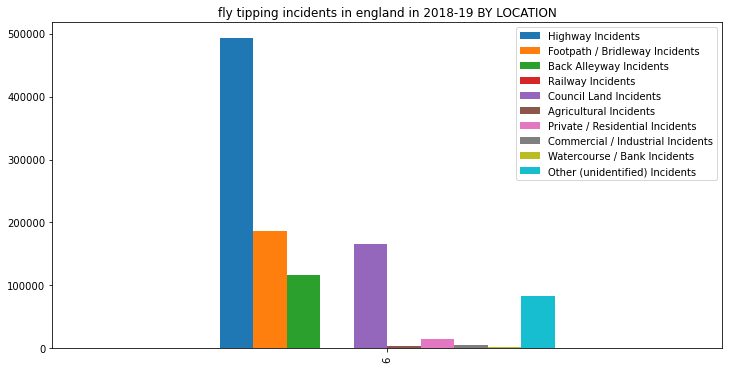

In [15]:
england_data.loc[england_data['Year'] == '2018-19'][locations].plot(kind='bar', figsize=(12,6))
plt.title('fly tipping incidents in england in 2018-19 BY LOCATION')

plt.show()

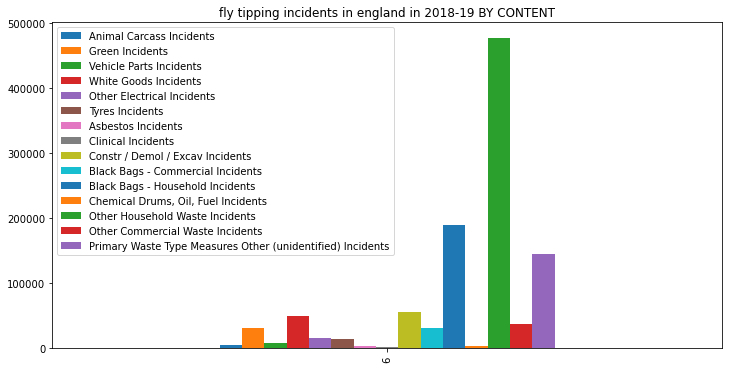

In [16]:
england_data.loc[england_data['Year'] == '2018-19'][content].plot(kind='bar', figsize=(12,6))
plt.title('fly tipping incidents in england in 2018-19 BY CONTENT')

plt.show()

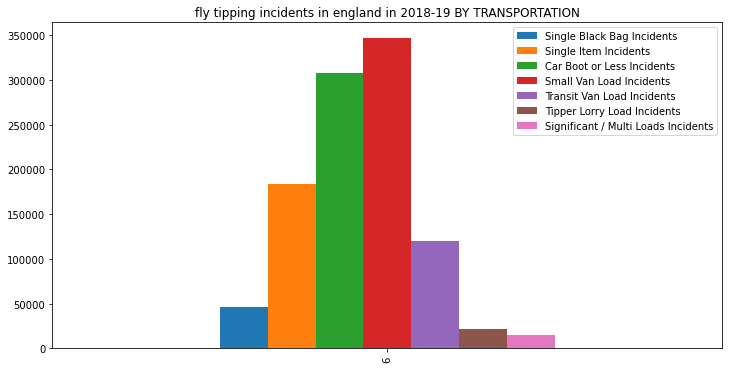

In [17]:
england_data.loc[england_data['Year'] == '2018-19'][transportation].plot(kind='bar', figsize=(12,6))
plt.title('fly tipping incidents in england in 2018-19 BY TRANSPORTATION')

plt.show()

# CLUSTERING

* We have an unlabelled dataset. Therefore clustering makes sense. We can then extract features from each cluster to see which common factors bind together different local authorities in each cluster. That will help from policy perspective. In theory each LA cluster could have a common set of objectives and policies. 

In [18]:
flytip_la.shape

(2282, 45)

In [19]:
flytip_la.head()

,Year,ONS Code,LA Name,Region,Total Incidents,Highway Incidents,Footpath / Bridleway Incidents,Back Alleyway Incidents,Railway Incidents,Council Land Incidents,...,Car Boot or Less Clearance Costs (£),Small Van Load Incidents,Small Van Load Clearance Costs (£),Transit Van Load Incidents,Transit Van Load Clearance Costs (£),Tipper Lorry Load Incidents,Tipper Lorry Load Clearance Costs (£),Significant / Multi Loads Incidents,Sig / Multi Loads Clearance Costs (£),Total Incidents Clearance Costs (£)
0,2012-13,E07000223,Adur,South East,244.0,40.0,5.0,5.0,0.0,178.0,...,2958.0,54.0,3024.0,11.0,1265.0,0.0,0,0.0,0,9370.0
1,2012-13,E07000026,Allerdale,North West,811.0,158.0,108.0,216.0,1.0,96.0,...,5046.0,428.0,23968.0,51.0,5865.0,17.0,5950,11.0,3940,47879.0
2,2012-13,E07000032,Amber Valley,East Midlands,219.0,174.0,18.0,0.0,0.0,25.0,...,580.0,59.0,3304.0,31.0,3565.0,2.0,700,2.0,4000,15172.0
3,2012-13,E07000224,Arun,South East,716.0,248.0,78.0,36.0,0.0,50.0,...,4147.0,140.0,7840.0,37.0,4255.0,12.0,3851,3.0,1080,24503.0
4,2012-13,E07000170,Ashfield,East Midlands,477.0,205.0,115.0,33.0,0.0,62.0,...,4756.0,162.0,9072.0,43.0,4945.0,0.0,10,0.0,0,21037.0


In [20]:
# removed features/columns that are not needed for clustering
removecolumns = [
                'Year', 'ONS Code', 'LA Name', 'Region',
                'Total Incidents',
                'Single Black Bag Clearance Costs (£)',
                 'Single Item Clearance Costs (£)',
                 'Car Boot or Less Clearance Costs (£)',
                 'Small Van Load Clearance Costs (£)',
                 'Transit Van Load Clearance Costs (£)',
                 'Tipper Lorry Load Clearance Costs (£)',
                 'Sig / Multi Loads Clearance Costs (£)',
                'Total Incidents Clearance Costs (£)'
                ]
                 

In [21]:
# keep only those features that can be used in clustering
keepcolumns = flytip_la.columns.difference(removecolumns, sort=False)
keepcolumns

Index(['Highway Incidents', 'Footpath / Bridleway Incidents',
       'Back Alleyway Incidents', 'Railway Incidents',
       'Council Land Incidents', 'Agricultural Incidents',
       'Private / Residential Incidents', 'Commercial / Industrial Incidents',
       'Watercourse / Bank Incidents', 'Other (unidentified) Incidents',
       'Animal Carcass Incidents', 'Green Incidents',
       'Vehicle Parts Incidents', 'White Goods Incidents',
       'Other Electrical Incidents', 'Tyres Incidents', 'Asbestos Incidents',
       'Clinical Incidents', 'Constr / Demol / Excav Incidents',
       'Black Bags - Commercial Incidents', 'Black Bags - Household Incidents',
       'Chemical Drums, Oil, Fuel Incidents',
       'Other Household Waste Incidents', 'Other Commercial Waste Incidents',
       'Primary Waste Type Measures Other (unidentified) Incidents',
       'Single Black Bag Incidents', 'Single Item Incidents',
       'Car Boot or Less Incidents', 'Small Van Load Incidents',
       'Transit 

In [22]:
df = flytip_la[keepcolumns].reset_index(drop=True)

In [23]:
df.isnull().sum()

Highway Incidents                                             25
Footpath / Bridleway Incidents                                22
Back Alleyway Incidents                                       22
Railway Incidents                                             25
Council Land Incidents                                        22
Agricultural Incidents                                        22
Private / Residential Incidents                               22
Commercial / Industrial Incidents                             24
Watercourse / Bank Incidents                                  24
Other (unidentified) Incidents                                22
Animal Carcass Incidents                                      23
Green Incidents                                               22
Vehicle Parts Incidents                                       22
White Goods Incidents                                         22
Other Electrical Incidents                                    22
Tyres Incidents          

In [24]:
df.dropna(inplace=True)
# they have been dropped because we cannot do a simple fillna by mean or median because 
# that will pick a mean across all local authorities

In [25]:
df.shape

(2252, 32)

In [26]:
df= df.astype(int)

In [27]:
df.dtypes

Highway Incidents                                             int64
Footpath / Bridleway Incidents                                int64
Back Alleyway Incidents                                       int64
Railway Incidents                                             int64
Council Land Incidents                                        int64
Agricultural Incidents                                        int64
Private / Residential Incidents                               int64
Commercial / Industrial Incidents                             int64
Watercourse / Bank Incidents                                  int64
Other (unidentified) Incidents                                int64
Animal Carcass Incidents                                      int64
Green Incidents                                               int64
Vehicle Parts Incidents                                       int64
White Goods Incidents                                         int64
Other Electrical Incidents                      

In [28]:
# stats reveals need to scale because the standard deviation among the features is too high compared to their means
flytip_la.describe()

,Total Incidents,Highway Incidents,Footpath / Bridleway Incidents,Back Alleyway Incidents,Railway Incidents,Council Land Incidents,Agricultural Incidents,Private / Residential Incidents,Commercial / Industrial Incidents,Watercourse / Bank Incidents,...,Single Item Clearance Costs (£),Car Boot or Less Incidents,Car Boot or Less Clearance Costs (£),Small Van Load Incidents,Small Van Load Clearance Costs (£),Transit Van Load Incidents,Transit Van Load Clearance Costs (£),Tipper Lorry Load Incidents,Significant / Multi Loads Incidents,Total Incidents Clearance Costs (£)
count,2261.000000,2257.000000,2260.000000,2260.000000,2257.000000,2260.000000,2260.000000,2260.000000,2258.000000,2258.000000,...,1612.000000,2260.000000,1.612000e+03,2260.000000,1.612000e+03,2260.000000,1.612000e+03,2260.000000,2260.000000,1.594000e+03
mean,2673.015038,1215.042534,440.170796,344.029646,2.120071,450.060177,8.435398,58.580531,19.689991,6.282108,...,12969.254963,725.872124,2.131145e+04,869.673009,4.710092e+04,343.200442,3.911297e+04,53.126549,27.580973,1.418008e+05
std,5166.133350,3736.343957,1645.487512,1122.843138,30.957621,1154.126920,29.966098,215.752469,85.537797,15.788805,...,30779.429896,2303.697743,7.255420e+04,1756.516344,9.952664e+04,799.448195,9.857051e+04,134.690099,145.045605,2.781570e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,515.000000,180.000000,22.000000,5.000000,0.000000,33.000000,0.000000,2.000000,0.000000,0.000000,...,2001.000000,102.000000,2.892750e+03,155.000000,8.064000e+03,51.000000,5.405000e+03,2.000000,0.000000,2.699750e+04
50%,1021.000000,386.000000,67.000000,26.000000,0.000000,95.000000,1.000000,10.000000,3.000000,2.000000,...,4553.000000,208.000000,5.988500e+03,330.500000,1.736000e+04,126.000000,1.334000e+04,14.000000,2.000000,5.385500e+04
75%,2588.000000,833.000000,210.000000,162.000000,1.000000,320.000000,7.000000,37.000000,13.000000,6.000000,...,11179.500000,509.000000,1.479725e+04,844.250000,4.582200e+04,332.000000,3.634000e+04,46.000000,13.000000,1.450748e+05
max,75614.000000,66959.000000,20256.000000,19017.000000,1322.000000,18967.000000,710.000000,3081.000000,1622.000000,208.000000,...,506775.000000,45443.000000,1.317847e+06,27017.000000,1.512952e+06,15265.000000,1.755475e+06,2052.000000,3624.000000,3.359219e+06


In [29]:
# just in case we need to compare data before and after scaling
df_before_scaling = df.copy()

In [30]:
from sklearn import preprocessing

In [31]:
scaler = preprocessing.StandardScaler()
df[keepcolumns] = scaler.fit_transform(df[keepcolumns])

#scaler = preprocessing.RobustScaler()  
# tried robust scaler as well becuase of distributions show that median might be a better pivot for scaling

In [32]:
# data to be used for clustering being converted to a matrix
# based on the number of dimensions in the data

X = np.matrix(df)
X

matrix([[-0.31477841, -0.26465064, -0.3018968 , ..., -0.41544613,
         -0.39455694, -0.19032476],
        [-0.28322251, -0.20214454, -0.11415014, ..., -0.36546271,
         -0.26851312, -0.1146008 ],
        [-0.27894375, -0.25676152, -0.30634577, ..., -0.39045442,
         -0.37972826, -0.17655677],
        ...,
        [-0.30461634, -0.15359611,  0.57811006, ..., -0.07930762,
         -0.22402706, -0.15590478],
        [-0.26370065, -0.13417674, -0.28766009, ..., -0.34297017,
         -0.11281192, -0.1146008 ],
        [-0.19069421, -0.23309417,  0.04779248, ..., -0.35296686,
         -0.39455694, -0.19032476]])

In [33]:
# initialise the algorithm
kmean_alg = KMeans(n_clusters=7)
# training the model
kmean_alg.fit(X)

KMeans(n_clusters=7)

In [34]:
# to identify the segment each Local Authority falls into 
segment_num = kmean_alg.predict(df)

In [35]:
segment_num
print(len(segment_num))

2252


In [36]:
df['LA_Segment'] = segment_num

In [37]:
df.head()

,Highway Incidents,Footpath / Bridleway Incidents,Back Alleyway Incidents,Railway Incidents,Council Land Incidents,Agricultural Incidents,Private / Residential Incidents,Commercial / Industrial Incidents,Watercourse / Bank Incidents,Other (unidentified) Incidents,...,Other Commercial Waste Incidents,Primary Waste Type Measures Other (unidentified) Incidents,Single Black Bag Incidents,Single Item Incidents,Car Boot or Less Incidents,Small Van Load Incidents,Transit Van Load Incidents,Tipper Lorry Load Incidents,Significant / Multi Loads Incidents,LA_Segment
0,-0.314778,-0.264651,-0.301897,-0.068460,-0.234874,-0.248314,-0.220916,-0.183732,-0.397832,-0.157240,...,-0.336340,-0.231345,-0.223308,-0.346878,-0.270751,-0.464575,-0.415446,-0.394557,-0.190325,1
1,-0.283223,-0.202145,-0.114150,-0.036186,-0.306026,0.051580,-0.179263,-0.172054,0.614505,0.065160,...,-0.256211,-0.160256,-0.183543,-0.321981,-0.239537,-0.251917,-0.365463,-0.268513,-0.114601,1
2,-0.278944,-0.256762,-0.306346,-0.068460,-0.367633,-0.281636,-0.271825,-0.207089,-0.397832,-0.157240,...,-0.336340,-0.230315,-0.229671,-0.318424,-0.306300,-0.461732,-0.390454,-0.379728,-0.176557,1
3,-0.259154,-0.220350,-0.274313,-0.068460,-0.345940,-0.015063,0.010489,-0.137018,0.045065,0.113081,...,-0.188733,0.056102,0.307950,-0.381555,-0.252976,-0.415675,-0.382957,-0.305585,-0.169673,1
4,-0.270654,-0.197897,-0.276983,-0.068460,-0.335528,-0.081706,-0.151495,-0.078627,-0.334561,-0.137580,...,-0.239341,-0.213830,-0.180362,-0.348656,-0.243872,-0.403166,-0.375459,-0.394557,-0.190325,1


In [38]:
centroid = kmean_alg.cluster_centers_
centroid

array([[ 2.30777790e+00,  7.46640090e-01, -9.93202277e-02,
        -2.90141758e-02, -1.87198715e-02,  2.45443790e+00,
         3.60138731e+00,  9.04347078e+00, -2.92380637e-01,
         7.07579422e-02,  1.14283562e+01,  4.30910954e+00,
         2.45969973e+00,  2.05686096e+00,  1.10944864e+00,
         1.27034933e+00,  5.36447266e+00,  6.41992026e-01,
         1.60298775e+00,  2.13830092e+00,  2.38468278e+00,
         3.62681569e+00,  1.06414971e+00,  3.56709001e-01,
         2.18542015e-01,  6.57117800e+00,  2.62997093e+00,
         8.00008612e-01,  9.77341774e-01,  2.75669619e+00,
         4.29048380e+00,  2.92319845e-01],
       [-1.63648937e-01, -1.57500468e-01, -1.20919642e-01,
        -3.37675855e-02, -1.52512715e-01, -5.47841126e-02,
        -1.14341026e-01, -7.52651777e-02, -2.14714972e-02,
        -9.46789129e-02, -9.21396092e-02, -1.89483010e-01,
        -1.60079094e-01, -2.12251055e-01, -1.87463577e-01,
        -1.60511076e-01, -4.24290798e-02, -4.33354755e-02,
        -1.99

In [39]:
df.groupby('LA_Segment').count()

,Highway Incidents,Footpath / Bridleway Incidents,Back Alleyway Incidents,Railway Incidents,Council Land Incidents,Agricultural Incidents,Private / Residential Incidents,Commercial / Industrial Incidents,Watercourse / Bank Incidents,Other (unidentified) Incidents,...,Other Household Waste Incidents,Other Commercial Waste Incidents,Primary Waste Type Measures Other (unidentified) Incidents,Single Black Bag Incidents,Single Item Incidents,Car Boot or Less Incidents,Small Van Load Incidents,Transit Van Load Incidents,Tipper Lorry Load Incidents,Significant / Multi Loads Incidents
LA_Segment,,,,,,,,,,,,,,,,,,,,,
0,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
1,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,...,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015
2,170,170,170,170,170,170,170,170,170,170,...,170,170,170,170,170,170,170,170,170,170
3,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
5,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
6,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15


In [40]:
# 1808 out of 2252 examples fall under one cluster. that is about 80%. 
# That means an overwhelming majority of the local authorities have similar fly tipping patterns
# Inserting the LA segment into flytip data by LA can tell us which cluster an LA belongs to in a particular year
# LAs like Brent, Barnet, Enfiled etc jump from one cluster to other from year to year indicating that there are active interventions to tackle fly-tipping in those LAs

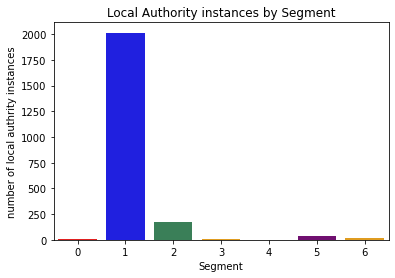

In [41]:
colormap = np.array(  ['red', 'blue', 
                       'seagreen','orange', 'grey', 'Purple',
                       'Orange', 'Violet', 'indigo', 'Black', 'Silver', 'red', 'blue','yellow','gold'] )

sns.countplot(df['LA_Segment'],palette = colormap)
plt.xlabel('Segment')
plt.ylabel('number of local authrity instances')
plt.title('Local Authority instances by Segment')
plt.show()

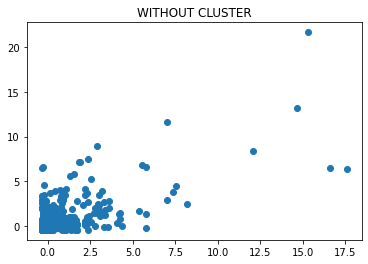

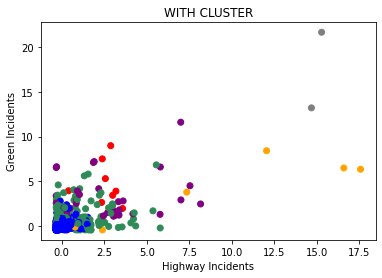

In [42]:
plt.scatter(df[['Highway Incidents']], df[['Green Incidents']])
plt.title('WITHOUT CLUSTER')
plt.show()


colormap = np.array(  ['red', 'blue', 
                       'seagreen','orange', 'grey', 'Purple',
                       'Orange', 'Violet', 'indigo', 'Black', 'Silver', 'red', 'blue','yellow','gold'] )

#plt.figuresize(figsize=12,6)
plt.scatter(df['Highway Incidents'], df['Green Incidents'], c = colormap[segment_num])
plt.xlabel('Highway Incidents')
plt.ylabel('Green Incidents')
plt.title('WITH CLUSTER')
plt.show()

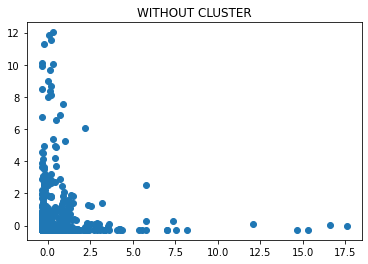

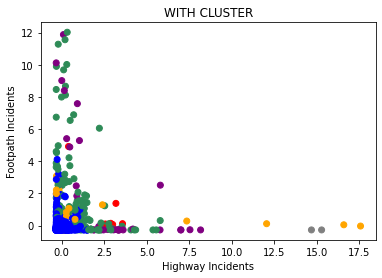

In [43]:
plt.scatter(df[['Highway Incidents']], df[['Footpath / Bridleway Incidents']])
plt.title('WITHOUT CLUSTER')
plt.show()




colormap = np.array(  ['red', 'blue', 
                       'seagreen','orange', 'grey', 'Purple',
                       'Orange', 'Violet', 'indigo', 'Black', 'Silver', 'red', 'blue','yellow','gold'] )

#plt.figuresize(figsize=12,6)
plt.scatter(df['Highway Incidents'], df['Footpath / Bridleway Incidents'],
            c = colormap[segment_num])
plt.xlabel('Highway Incidents')
plt.ylabel('Footpath Incidents')
plt.title('WITH CLUSTER')
plt.show()

In [44]:
# since a heatmap may not fit and may not be visualised easily due to several features, a correlation matrix may be a substitute
# highly correlated features (incident types) can be extracted from this simple correlation table as well
df.corr()

,Highway Incidents,Footpath / Bridleway Incidents,Back Alleyway Incidents,Railway Incidents,Council Land Incidents,Agricultural Incidents,Private / Residential Incidents,Commercial / Industrial Incidents,Watercourse / Bank Incidents,Other (unidentified) Incidents,...,Other Commercial Waste Incidents,Primary Waste Type Measures Other (unidentified) Incidents,Single Black Bag Incidents,Single Item Incidents,Car Boot or Less Incidents,Small Van Load Incidents,Transit Van Load Incidents,Tipper Lorry Load Incidents,Significant / Multi Loads Incidents,LA_Segment
Highway Incidents,1.000000,0.050534,0.067378,0.344815,0.287020,0.047802,0.221247,0.121962,0.009172,0.051574,...,0.504395,0.159212,0.251357,0.545558,0.769706,0.757100,0.421771,0.277685,0.120801,0.430157
Footpath / Bridleway Incidents,0.050534,1.000000,0.049246,0.008356,0.300566,0.095162,0.065562,0.064503,0.018332,0.117417,...,0.414718,0.195801,0.242058,0.296020,0.388362,0.342218,0.358244,0.206320,0.312640,0.355457
Back Alleyway Incidents,0.067378,0.049246,1.000000,0.010118,0.116575,0.080535,0.029817,0.048748,0.044956,0.008315,...,0.120046,0.182543,0.038807,0.142384,0.175654,0.308197,0.306247,0.274030,0.250466,0.416250
Railway Incidents,0.344815,0.008356,0.010118,1.000000,0.024241,0.068846,0.162373,0.030276,0.007473,0.001646,...,0.009963,0.014677,0.086969,0.257096,0.288482,0.180178,0.089431,0.047908,0.035354,0.086334
Council Land Incidents,0.287020,0.300566,0.116575,0.024241,1.000000,0.109786,0.041218,0.112186,0.014570,0.052622,...,0.406838,0.126369,0.091966,0.322083,0.482431,0.568819,0.365169,0.324802,0.242517,0.336263
Agricultural Incidents,0.047802,0.095162,0.080535,0.068846,0.109786,1.000000,0.098190,0.117850,0.143674,0.036471,...,0.114740,0.056171,0.359986,0.162150,0.063141,0.122587,0.075215,0.116596,0.087662,0.065873
Private / Residential Incidents,0.221247,0.065562,0.029817,0.162373,0.041218,0.098190,1.000000,0.336292,0.041474,0.011261,...,0.178157,0.004096,0.118944,0.188672,0.180837,0.206581,0.208840,0.172842,0.098145,0.130349
Commercial / Industrial Incidents,0.121962,0.064503,0.048748,0.030276,0.112186,0.117850,0.336292,1.000000,0.047144,0.008529,...,0.160245,0.019524,0.138153,0.137949,0.081038,0.136679,0.235065,0.273286,0.110779,0.035227
Watercourse / Bank Incidents,0.009172,0.018332,0.044956,0.007473,0.014570,0.143674,0.041474,0.047144,1.000000,0.000326,...,0.087702,0.020530,0.000320,0.024814,-0.007520,0.048433,0.063933,0.120369,0.049453,0.036521
Other (unidentified) Incidents,0.051574,0.117417,0.008315,0.001646,0.052622,0.036471,0.011261,0.008529,0.000326,1.000000,...,0.204081,0.730306,0.184703,0.501212,0.103128,0.127678,0.090949,0.162376,0.054403,0.533707


In [45]:
df.columns

Index(['Highway Incidents', 'Footpath / Bridleway Incidents',
       'Back Alleyway Incidents', 'Railway Incidents',
       'Council Land Incidents', 'Agricultural Incidents',
       'Private / Residential Incidents', 'Commercial / Industrial Incidents',
       'Watercourse / Bank Incidents', 'Other (unidentified) Incidents',
       'Animal Carcass Incidents', 'Green Incidents',
       'Vehicle Parts Incidents', 'White Goods Incidents',
       'Other Electrical Incidents', 'Tyres Incidents', 'Asbestos Incidents',
       'Clinical Incidents', 'Constr / Demol / Excav Incidents',
       'Black Bags - Commercial Incidents', 'Black Bags - Household Incidents',
       'Chemical Drums, Oil, Fuel Incidents',
       'Other Household Waste Incidents', 'Other Commercial Waste Incidents',
       'Primary Waste Type Measures Other (unidentified) Incidents',
       'Single Black Bag Incidents', 'Single Item Incidents',
       'Car Boot or Less Incidents', 'Small Van Load Incidents',
       'Transit 

Highway Indicents VERSUS  Highway Incidents


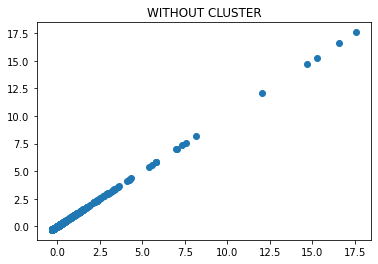

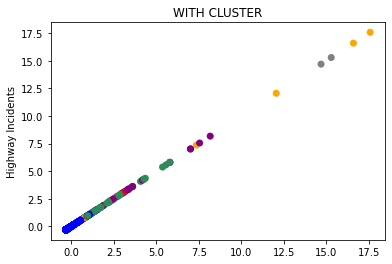

Highway Indicents VERSUS  Animal Carcass Incidents


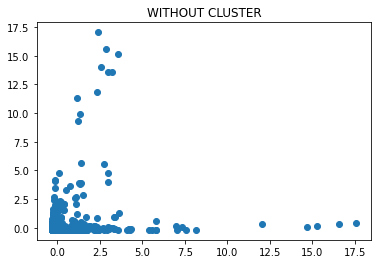

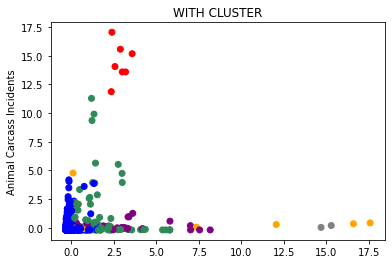

Highway Indicents VERSUS  Green Incidents


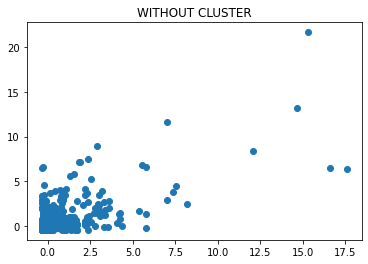

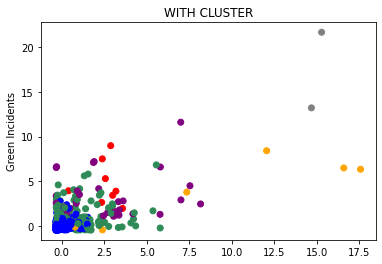

Highway Indicents VERSUS  Vehicle Parts Incidents


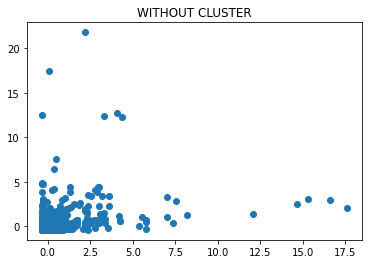

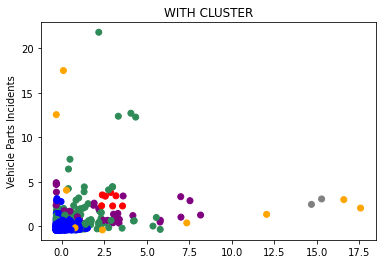

Highway Indicents VERSUS  Car Boot or Less Incidents


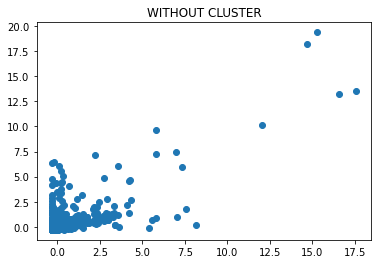

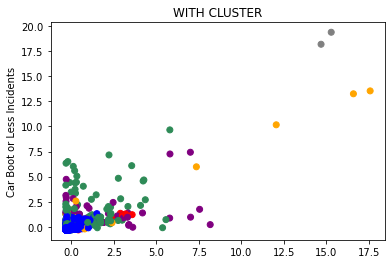

Highway Indicents VERSUS  Tipper Lorry Load Incidents


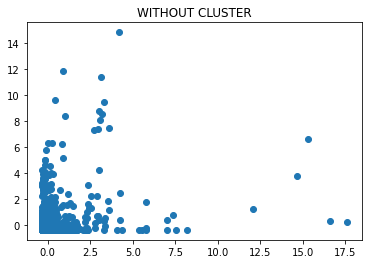

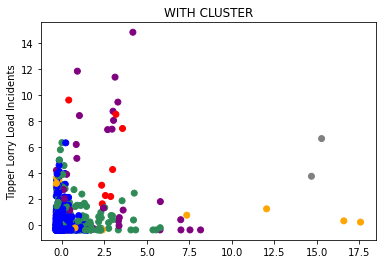

In [46]:
colormap = np.array(  ['red', 'blue', 
                       'seagreen','orange', 'grey', 'Purple',
                       'Orange', 'Violet', 'indigo', 'Black', 'Silver', 'red', 'blue','yellow','gold'] )

scattervars = ['Highway Incidents','Animal Carcass Incidents', 'Green Incidents',
       'Vehicle Parts Incidents','Car Boot or Less Incidents', 'Tipper Lorry Load Incidents']

for svars in scattervars:
    
    print('Highway Indicents VERSUS ', svars)
    plt.scatter(df[['Highway Incidents']],df[[svars]])
    plt.title('WITHOUT CLUSTER')
    plt.show()
    
    plt.scatter(df['Highway Incidents'], df[svars], c = colormap[segment_num])
    plt.ylabel(svars)
    plt.title('WITH CLUSTER')
    plt.show()
    
    

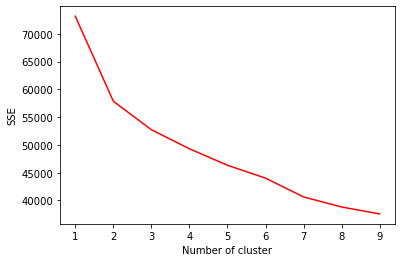

In [47]:
# Elbow graph
# Helps determine the best number of clusters

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df)   
    df["LA_Segment"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), color="red")
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

# REGRESSION

* Regression can help us determine which factors are responsible for the level of incidents. It can also help us in forecasting the incidents.

### get the population data first from ONS website

In [48]:
populationla = pd.read_csv('population_la.csv')
populationla.head()

,ladcode19,laname19,country,population_2001,births_2002,deaths_2002,natchange_2002,internal_in_2002,internal_out_2002,internal_net_2002,...,deaths_2019,natchange_2019,internal_in_2019,internal_out_2019,internal_net_2019,international_in_2019,international_out_2019,international_net_2019,other_change_2019,population_2019
0,E06000001,Hartlepool,E,90152,1017,1042,-25,2140,2301,-161,...,995,18,3059,2958,101,394,79,315,-13,93663
1,E06000002,Middlesbrough,E,141233,1663,1396,267,5109,6737,-1628,...,1406,385,7041,8168,-1127,1570,403,1167,10,140980
2,E06000003,Redcar and Cleveland,E,139159,1336,1523,-187,3951,4259,-308,...,1539,-222,5082,4636,446,272,70,202,6,137150
3,E06000004,Stockton-on-Tees,E,183795,1938,1719,219,6269,5531,738,...,1883,226,7435,8559,-1124,1384,371,1013,20,197348
4,E06000005,Darlington,E,97894,1102,1173,-71,3815,3521,294,...,1177,-82,4562,4321,241,327,253,74,4,106803


In [49]:
flytip_la.head()

,Year,ONS Code,LA Name,Region,Total Incidents,Highway Incidents,Footpath / Bridleway Incidents,Back Alleyway Incidents,Railway Incidents,Council Land Incidents,...,Car Boot or Less Clearance Costs (£),Small Van Load Incidents,Small Van Load Clearance Costs (£),Transit Van Load Incidents,Transit Van Load Clearance Costs (£),Tipper Lorry Load Incidents,Tipper Lorry Load Clearance Costs (£),Significant / Multi Loads Incidents,Sig / Multi Loads Clearance Costs (£),Total Incidents Clearance Costs (£)
0,2012-13,E07000223,Adur,South East,244.0,40.0,5.0,5.0,0.0,178.0,...,2958.0,54.0,3024.0,11.0,1265.0,0.0,0,0.0,0,9370.0
1,2012-13,E07000026,Allerdale,North West,811.0,158.0,108.0,216.0,1.0,96.0,...,5046.0,428.0,23968.0,51.0,5865.0,17.0,5950,11.0,3940,47879.0
2,2012-13,E07000032,Amber Valley,East Midlands,219.0,174.0,18.0,0.0,0.0,25.0,...,580.0,59.0,3304.0,31.0,3565.0,2.0,700,2.0,4000,15172.0
3,2012-13,E07000224,Arun,South East,716.0,248.0,78.0,36.0,0.0,50.0,...,4147.0,140.0,7840.0,37.0,4255.0,12.0,3851,3.0,1080,24503.0
4,2012-13,E07000170,Ashfield,East Midlands,477.0,205.0,115.0,33.0,0.0,62.0,...,4756.0,162.0,9072.0,43.0,4945.0,0.0,10,0.0,0,21037.0


In [50]:
flytip_la2 = flytip_la.drop(cost_items, axis=1).reset_index(drop=True)

In [51]:
flytip_la2.isnull().sum()

Year                                                           0
ONS Code                                                       0
LA Name                                                        0
Region                                                         0
Total Incidents                                               21
Highway Incidents                                             25
Footpath / Bridleway Incidents                                22
Back Alleyway Incidents                                       22
Railway Incidents                                             25
Council Land Incidents                                        22
Agricultural Incidents                                        22
Private / Residential Incidents                               22
Commercial / Industrial Incidents                             24
Watercourse / Bank Incidents                                  24
Other (unidentified) Incidents                                22
Animal Carcass Incidents 

In [52]:
flytip_la2.dropna(inplace=True)

In [53]:
flytip_la2.shape

(2252, 37)

In [54]:
# take out 2018-19 population from the above table and merge with local authority fly tipping data
pop19cols=['ladcode19', 'population_2019']
population19 = populationla[pop19cols]
population19.columns = ['ONS Code', 'population_2019']
flytip_la2 = pd.merge(flytip_la2,population19, on='ONS Code', how='left')

### now get the deprivation data from data.gov.uk. data prep below

In [55]:
# first the IMD scores
dep_IMD = pd.read_excel('lads.xlsx','IMD')
ladscols_IMD = ['Local Authority District code (2019)', 'IMD - Average score ']
dep_IMD = dep_IMD[ladscols_IMD]


# now the education score
dep_EDU = pd.read_excel('lads.xlsx','Education')
ladscols_EDU = ['Local Authority District code (2019)', 'Education, Skills and Training - Average score ']
dep_EDU = dep_EDU[ladscols_EDU]


# now the income score
dep_INC = pd.read_excel('lads.xlsx','Income')
ladscols_INC = ['Local Authority District code (2019)', 'Income - Average score ']
dep_INC = dep_INC[ladscols_INC]


# now the employment score
dep_EMP = pd.read_excel('lads.xlsx','Employment')
ladscols_EMP = ['Local Authority District code (2019)', 'Employment - Average score ']
dep_EMP = dep_EMP[ladscols_EMP]


# now the health score
dep_HLT = pd.read_excel('lads.xlsx','Health')
ladscols_HLT = ['Local Authority District code (2019)', 'Health Deprivation and Disability - Average score ']
dep_HLT = dep_HLT[ladscols_HLT]


# now the crime score
dep_CRM = pd.read_excel('lads.xlsx','Crime')
ladscols_CRM = ['Local Authority District code (2019)', 'Crime - Average score ']
dep_CRM = dep_CRM[ladscols_CRM]


# merge the above data on deprivation indices and rename the ons code column in order to have consistency with flytip_la table and make joins
from functools import reduce
dep= reduce(lambda x,y: pd.merge(x,y, on='Local Authority District code (2019)', how='outer'), [dep_IMD, dep_EDU, dep_INC, dep_EMP, dep_HLT, dep_CRM])
dep=dep.rename(columns = {'Local Authority District code (2019)':'ONS Code'}) 

dep.head()

,ONS Code,IMD - Average score,"Education, Skills and Training - Average score",Income - Average score,Employment - Average score,Health Deprivation and Disability - Average score,Crime - Average score
0,E06000001,35.037,30.255,0.228,0.185,0.869,0.566
1,E06000002,40.460,38.850,0.251,0.191,1.194,0.701
2,E06000003,29.792,27.768,0.186,0.165,0.790,0.138
3,E06000004,25.790,24.786,0.164,0.135,0.684,-0.111
4,E06000005,25.657,27.402,0.153,0.128,0.532,0.558


In [56]:
# now merge dep and flytip_la2 (flytip_la2 has all local authorities flytipping data and the newly added population column)
df_reg = pd.merge(flytip_la2,dep, on='ONS Code', how='left')
df_reg.head()

,Year,ONS Code,LA Name,Region,Total Incidents,Highway Incidents,Footpath / Bridleway Incidents,Back Alleyway Incidents,Railway Incidents,Council Land Incidents,...,Transit Van Load Incidents,Tipper Lorry Load Incidents,Significant / Multi Loads Incidents,population_2019,IMD - Average score,"Education, Skills and Training - Average score",Income - Average score,Employment - Average score,Health Deprivation and Disability - Average score,Crime - Average score
0,2012-13,E07000223,Adur,South East,244.0,40.0,5.0,5.0,0.0,178.0,...,11.0,0.0,0.0,64301.0,17.594,26.162,0.108,0.089,-0.055,-0.366
1,2012-13,E07000026,Allerdale,North West,811.0,158.0,108.0,216.0,1.0,96.0,...,51.0,17.0,11.0,97761.0,22.938,27.873,0.121,0.113,0.189,-0.586
2,2012-13,E07000032,Amber Valley,East Midlands,219.0,174.0,18.0,0.0,0.0,25.0,...,31.0,2.0,2.0,128147.0,17.970,25.729,0.109,0.095,0.114,-0.748
3,2012-13,E07000224,Arun,South East,716.0,248.0,78.0,36.0,0.0,50.0,...,37.0,12.0,3.0,160758.0,18.638,24.399,0.104,0.090,0.128,-0.236
4,2012-13,E07000170,Ashfield,East Midlands,477.0,205.0,115.0,33.0,0.0,62.0,...,43.0,0.0,0.0,127918.0,26.308,35.490,0.152,0.132,0.542,0.193


In [57]:
df_reg.shape

(2252, 44)

In [58]:
df_reg.isnull().sum()

Year                                                           0
ONS Code                                                       0
LA Name                                                        0
Region                                                         0
Total Incidents                                                0
Highway Incidents                                              0
Footpath / Bridleway Incidents                                 0
Back Alleyway Incidents                                        0
Railway Incidents                                              0
Council Land Incidents                                         0
Agricultural Incidents                                         0
Private / Residential Incidents                                0
Commercial / Industrial Incidents                              0
Watercourse / Bank Incidents                                   0
Other (unidentified) Incidents                                 0
Animal Carcass Incidents 

In [59]:
df_reg.dropna(inplace=True)

In [60]:
reg_cols= ['Total Incidents','population_2019',
       'IMD - Average score ',
       'Education, Skills and Training - Average score ',
       'Income - Average score ', 'Employment - Average score ',
       'Health Deprivation and Disability - Average score ',
       'Crime - Average score ']

In [61]:
dfreg = df_reg[reg_cols]

In [62]:
dfreg.corr()

,Total Incidents,population_2019,IMD - Average score,"Education, Skills and Training - Average score",Income - Average score,Employment - Average score,Health Deprivation and Disability - Average score,Crime - Average score
Total Incidents,1.000000,0.524857,0.369899,0.085118,0.390714,0.232556,0.202593,0.410842
population_2019,0.524857,1.000000,0.391888,0.145214,0.416915,0.292206,0.274139,0.441872
IMD - Average score,0.369899,0.391888,1.000000,0.795272,0.979342,0.944292,0.899977,0.708991
"Education, Skills and Training - Average score",0.085118,0.145214,0.795272,1.000000,0.749781,0.803398,0.810150,0.490339
Income - Average score,0.390714,0.416915,0.979342,0.749781,1.000000,0.946100,0.875842,0.723741
Employment - Average score,0.232556,0.292206,0.944292,0.803398,0.946100,1.000000,0.923736,0.597915
Health Deprivation and Disability - Average score,0.202593,0.274139,0.899977,0.810150,0.875842,0.923736,1.000000,0.573402
Crime - Average score,0.410842,0.441872,0.708991,0.490339,0.723741,0.597915,0.573402,1.000000


In [63]:
dfreg.isnull().sum()

Total Incidents                                       0
population_2019                                       0
IMD - Average score                                   0
Education, Skills and Training - Average score        0
Income - Average score                                0
Employment - Average score                            0
Health Deprivation and Disability - Average score     0
Crime - Average score                                 0
dtype: int64

In [64]:
# scikit linked scipy : machine learning library 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# model selection
from sklearn import model_selection

In [65]:
dfreg.columns

Index(['Total Incidents', 'population_2019', 'IMD - Average score ',
       'Education, Skills and Training - Average score ',
       'Income - Average score ', 'Employment - Average score ',
       'Health Deprivation and Disability - Average score ',
       'Crime - Average score '],
      dtype='object')

In [66]:
Xs = dfreg[['population_2019', 'IMD - Average score ',
       'Education, Skills and Training - Average score ',
       'Income - Average score ', 'Employment - Average score ',
       'Health Deprivation and Disability - Average score ',
       'Crime - Average score ']].values

Ys =dfreg[['Total Incidents']].values

In [67]:
test_percentage = 0.20
seed = 21

# Split-out validation dataset
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(Xs, Ys, test_size=test_percentage, random_state=seed)

In [68]:
regr = linear_model.LinearRegression() 
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)


# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept / constant:\n',regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print('R-Square: %.2f' % r2_score(Y_test, Y_pred))

Coefficients: 
 [[ 1.27511926e-02  3.72615384e+02 -1.39286536e+02  8.72468760e+04
  -1.19405914e+05 -9.90373561e+02 -7.85588271e+01]]
Intercept / constant:
 [-3137.97350917]
Mean squared error: 12555884.94
R-Square: 0.49


* R-square of around 0.5 is not good enough and it tells us that the explanatory variables that we have selected (population, income, crime indices etc) are not capturing the fly-tipping picture. They are unable to satisfactorily explain the level of fly-tipping incidents. I tried Random Forest as well but that did not give a good accuracy/recall/precision. I am therefore inclined to think that we settle with clustering for now and at the same time collect more secondary data and hopefully they will be able to capture and explain the level fo flytipping incidents. Below is the list of secondary datasets we may consider collecting and then trying again. 

### further secondary data we could collect for regression analysis (time permitting)

* Rates charged by recycling plants 
* Number of recycling plants in a local authority
* Actions and outcomes data: Penalties data
* Deeper local authority demographics
* Price of scrap metal in the local authority
* Level of construction activity in the area
* Number of charity shops in the LA
* Lagged variables from above data
* number of people in LA who are new to the LA
* money spent by LA on fly-tipping awareness
* number of private licensed waste carriers and brokers in the LA